## Resale Flat Prices

In [4]:
# Packages

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt

#Encoding packages

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

# *Reading the "csv" files (Registration)* 

In [2]:
# reading the 1990 to 1999
df_1= pd.read_csv(r"C:\Users\Administrator\Desktop\VS Code\Projects\Singapore Resale\Data\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df_1.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000


In [3]:
# reading the 2000 to 2012
df_2= pd.read_csv(r"C:\Users\Administrator\Desktop\VS Code\Projects\Singapore Resale\Data\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df_2.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0


In [5]:
# reading the 2012 to 2014
df_3= pd.read_csv(r"C:\Users\Administrator\Desktop\VS Code\Projects\Singapore Resale\Data\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df_3.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0


In [6]:
# reading the 2015 to 2016
df_4= pd.read_csv(r"C:\Users\Administrator\Desktop\VS Code\Projects\Singapore Resale\Data\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_4.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [8]:
df_4.drop(columns=["remaining_lease"],inplace= True)
df_4.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0


In [7]:
# reading the 2017 to onwards
df_5= pd.read_csv(r"C:\Users\Administrator\Desktop\VS Code\Projects\Singapore Resale\Data\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df_5.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


In [9]:
df_5.drop(columns=["remaining_lease"],inplace= True)
df_5.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0


## Preprocessing

In [10]:

df= pd.concat([df_1,df_2,df_3,df_4,df_5],axis= 0)
df.reset_index(drop= True, inplace= True)
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922044 entries, 0 to 922043
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                922044 non-null  object 
 1   town                 922044 non-null  object 
 2   flat_type            922044 non-null  object 
 3   block                922044 non-null  object 
 4   street_name          922044 non-null  object 
 5   storey_range         922044 non-null  object 
 6   floor_area_sqm       922044 non-null  float64
 7   flat_model           922044 non-null  object 
 8   lease_commence_date  922044 non-null  int64  
 9   resale_price         922044 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 70.3+ MB


In [12]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [13]:
# This Dataset have not any null values

## Encoding the catogarical columns and 
## chaning the datatype

In [14]:
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0


In [15]:
# Creating a new column "address"
df["address"]= df["block"]+" "+df["street_name"]

In [16]:
#droping the "street_name" and "block"
df2= df.drop(columns=["block","street_name"])

In [17]:
df2.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,address
0,1990-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,309 ANG MO KIO AVE 1
1,1990-01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,309 ANG MO KIO AVE 1


In [18]:
# for month
df2["month"] = pd.to_datetime(df2["month"], format="%Y-%m")

In [19]:
#spliting the month column to "Year", "month", "day"
df2["year"]= df2["month"].dt.year
df2["month"]= df2["month"].dt.month

In [20]:
df2.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,year
0,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,309 ANG MO KIO AVE 1,1990
1,1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,309 ANG MO KIO AVE 1,1990


In [21]:
df2["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [22]:
df2["town"].nunique()

27

In [23]:
df2["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [24]:
df2["flat_type"].nunique()

8

In [25]:
df2["flat_model"].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [26]:
df2["flat_model"].nunique()

34

In [27]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df2["town"]= LabelEncoder().fit_transform(df2["town"])
df2["flat_model"]= OrdinalEncoder().fit_transform(df2[["flat_model"]])
df2["flat_type"]= OrdinalEncoder().fit_transform(df2[["flat_type"]])

In [28]:
df2["town"].unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 19, 21,
       22, 23, 24, 25, 26, 15, 20,  5, 17, 18])

In [29]:
df2["flat_type"].unique()

array([0., 2., 3., 4., 1., 5., 6., 7.])

In [30]:
df2["flat_model"].unique()

array([ 7., 20., 12., 27., 26., 13.,  3., 11., 30.,  0.,  8., 14., 22.,
        9., 21., 16., 29.,  5., 28., 17., 15., 19.,  4., 23., 31., 10.,
       25.,  1., 18.,  6., 32., 33., 24.,  2.])

In [31]:
df2.tail(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,year
922042,3,26,5.0,04 TO 06,146.0,15.0,1988,860000.0,360 YISHUN RING RD,2024
922043,3,26,5.0,07 TO 09,142.0,5.0,1987,780000.0,606 YISHUN ST 61,2024


In [32]:
df2[["storey_start", "storey_end"]]= df2["storey_range"].str.split(" TO ",expand=True)

In [33]:
#droping the "storey_range" column
df2.drop(columns=["storey_range"],inplace= True)

In [34]:
df2.head(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,year,storey_start,storey_end
0,1,0,0.0,31.0,7.0,1977,9000.0,309 ANG MO KIO AVE 1,1990,10,12
1,1,0,0.0,31.0,7.0,1977,6000.0,309 ANG MO KIO AVE 1,1990,04,06


In [35]:
df2["address"].nunique()

9829

In [36]:
df2["address"]= LabelEncoder().fit_transform(df2["address"])

In [37]:
df2["storey_start"]= df2["storey_start"].astype(int)
df2["storey_end"]= df2["storey_end"].astype(int)

In [47]:
df2.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end'],
      dtype='object')

In [49]:
# set the columns
df3= df2[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_start', 'storey_end', 'lease_commence_date', 'resale_price']]

In [50]:
df4=df3.sort_values(by=["year","month"])

In [53]:
df4.to_csv("ResaleFlatPrices.csv", index= False)

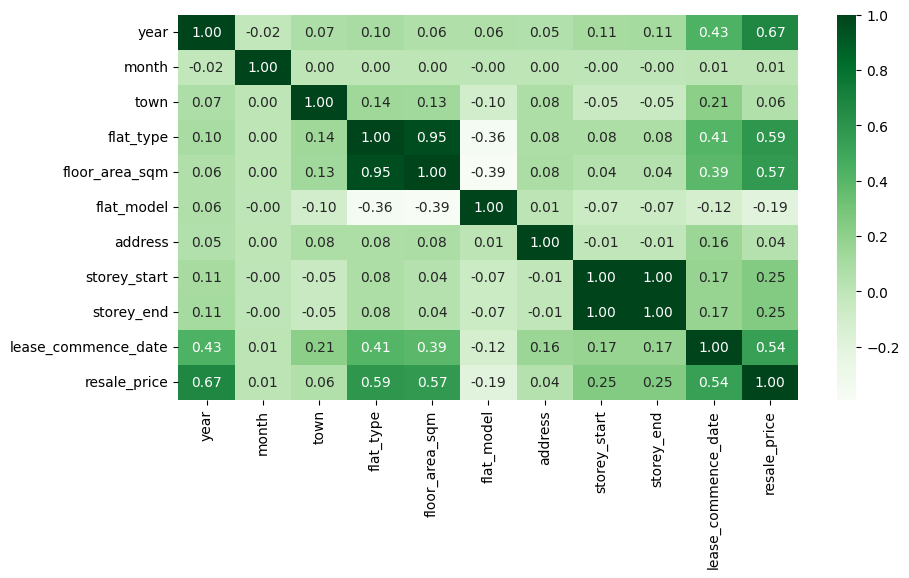

In [54]:
# Checking the Correlation using heatmap

df_4_corr= df4.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_4_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [55]:
df_final= pd.read_csv(r"C:\Users\Administrator\Desktop\VS Code\Projects\Singapore Resale\New folder\ResaleFlatPrices.csv")
df_final.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,lease_commence_date,resale_price
0,1990,1,0,0.0,31.0,7.0,3832,10,12,1977,9000.0
1,1990,1,0,0.0,31.0,7.0,3832,4,6,1977,6000.0


In [56]:
# checking the duplicate values
df_final.duplicated().sum()

1964

In [57]:
df_final_1= df_final.drop_duplicates()
df_final_1.reset_index(drop= True, inplace= True)

In [58]:
df_final_1.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,lease_commence_date,resale_price
920078,2024,3,26,5.0,146.0,15.0,4648,4,6,1988,860000.0
920079,2024,3,26,5.0,142.0,5.0,7251,7,9,1987,780000.0


In [46]:
# The month,address column does have very lowest correlation with other features
# So I drop the month and address columns

In [59]:
df_final_2= df_final_1.drop(columns=["month","address"])

In [60]:
df_final_2.tail(2)

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,lease_commence_date,resale_price
920078,2024,26,5.0,146.0,15.0,4,6,1988,860000.0
920079,2024,26,5.0,142.0,5.0,7,9,1987,780000.0


In [61]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

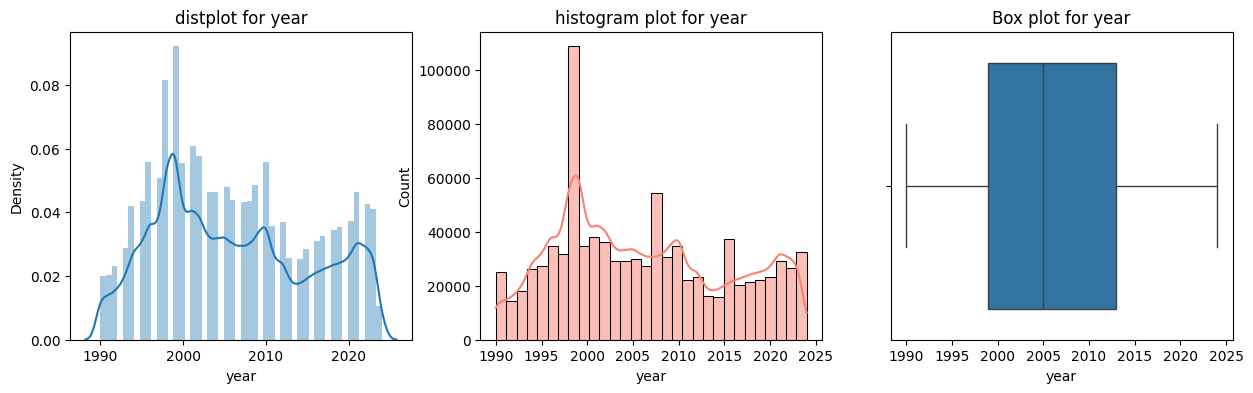

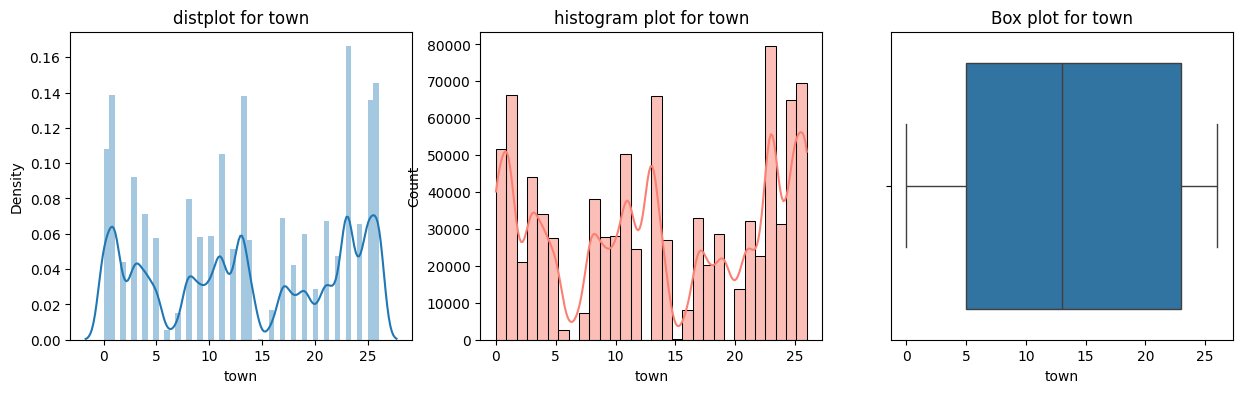

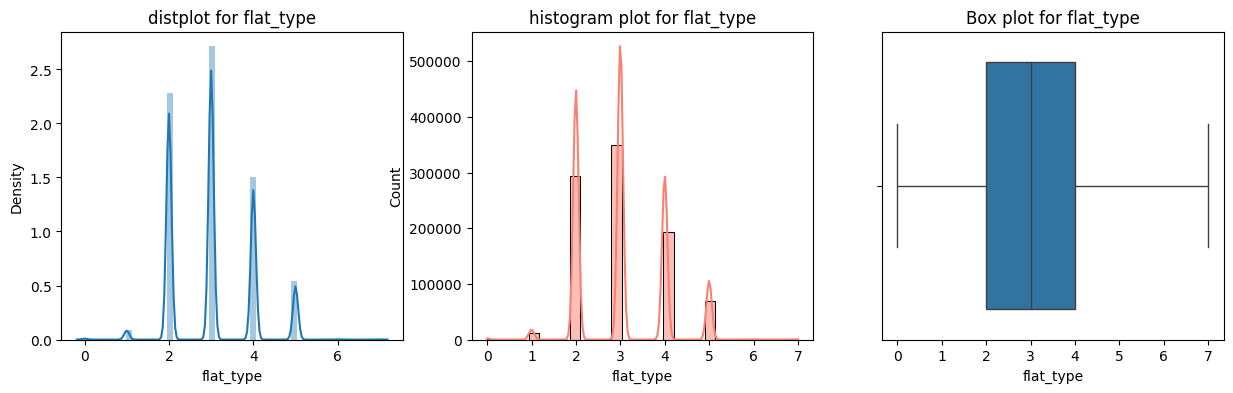

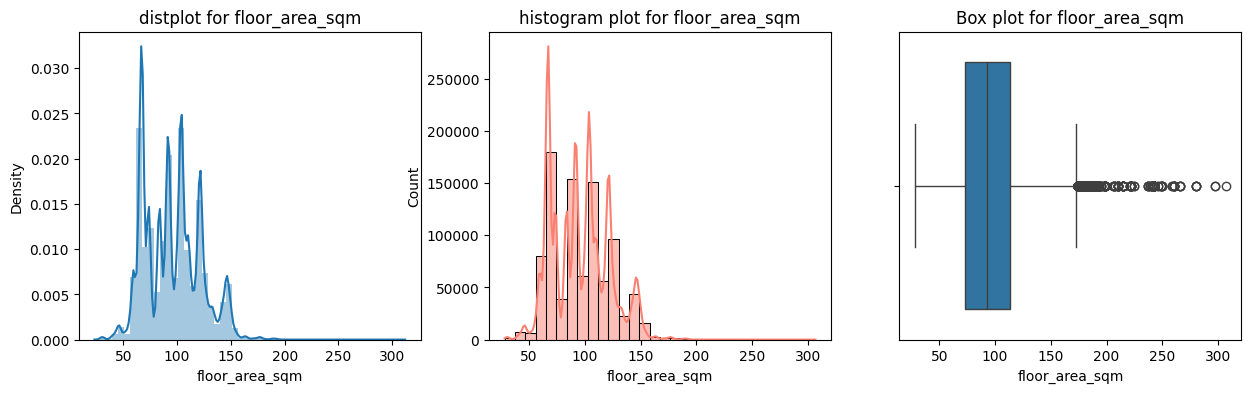

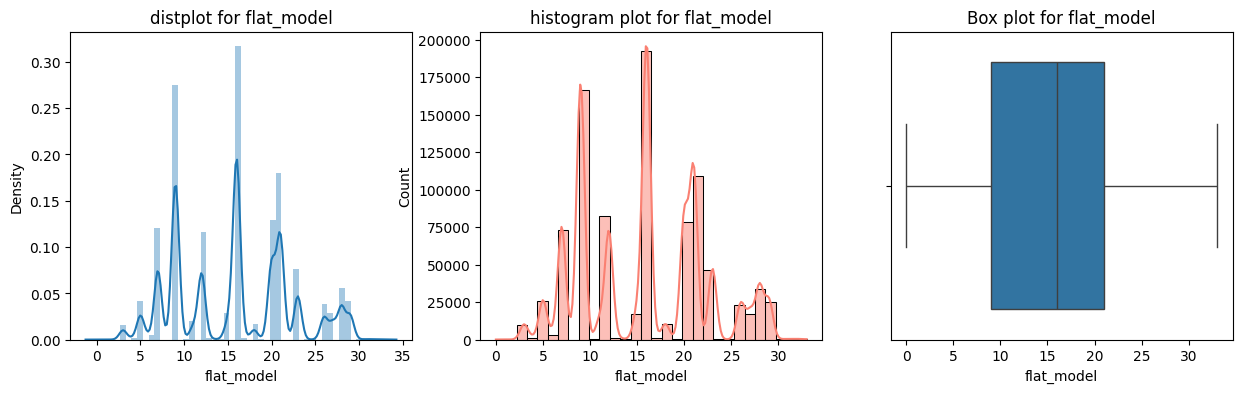

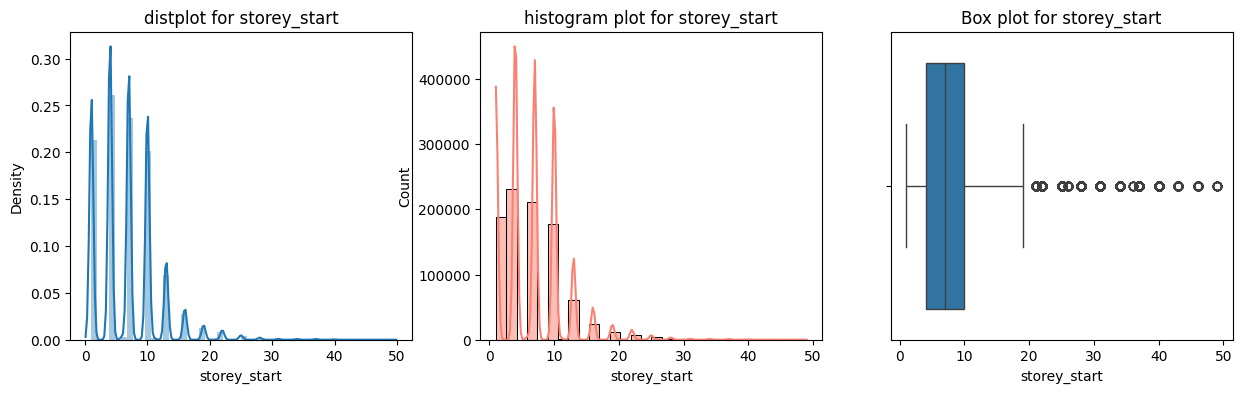

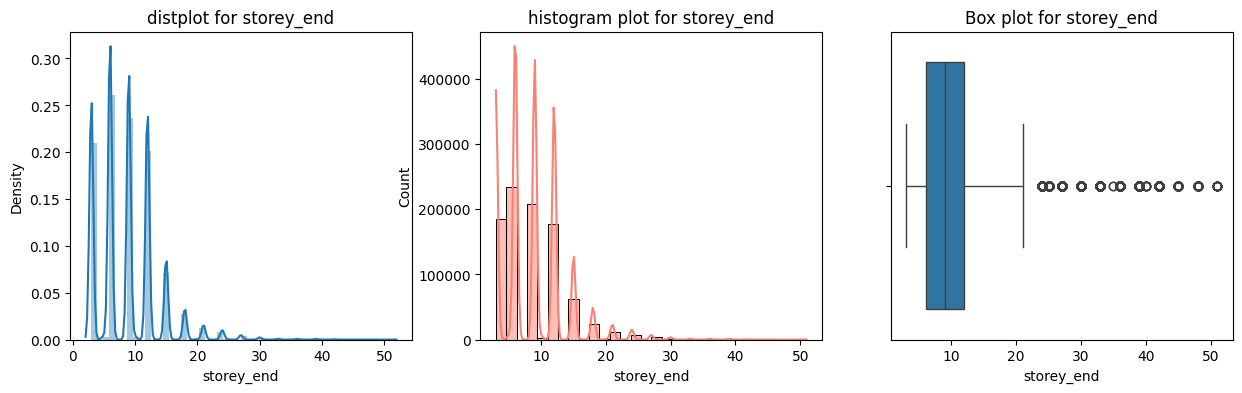

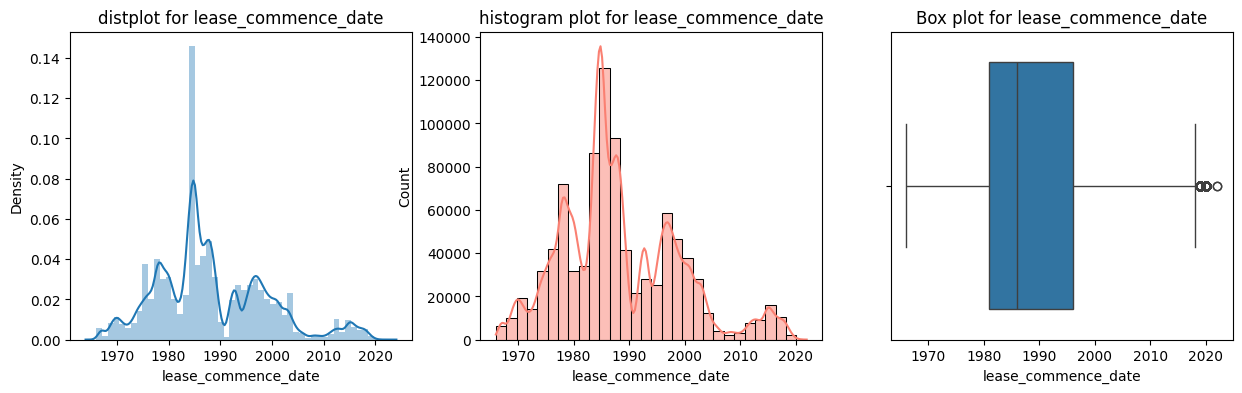

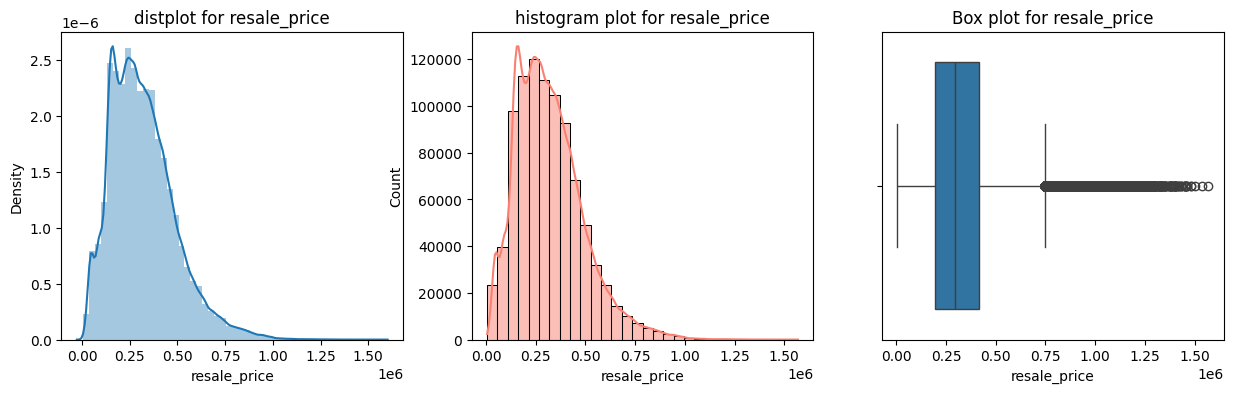

In [62]:
for i in df_final_2.columns:
    plot(df_final_2,i)

In [63]:
df_final_2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,920080.0,2006.072916,9.250057,1990.0,1999.0,2005.0,2013.0,2024.0
town,920080.0,13.650055,8.797353,0.0,5.0,13.0,23.0,26.0
flat_type,920080.0,3.014853,0.949479,0.0,2.0,3.0,4.0,7.0
floor_area_sqm,920080.0,95.719136,25.832873,28.0,73.0,93.0,113.0,307.0
flat_model,920080.0,15.713954,6.671384,0.0,9.0,16.0,21.0,33.0
storey_start,920080.0,6.677035,4.816076,1.0,4.0,7.0,10.0,49.0
storey_end,920080.0,8.691885,4.816094,3.0,6.0,9.0,12.0,51.0
lease_commence_date,920080.0,1988.225263,10.603715,1966.0,1981.0,1986.0,1996.0,2022.0
resale_price,920080.0,319328.170010,169084.608837,5000.0,193000.0,295000.0,415000.0,1568888.0


## skewness handling

In [64]:
df_final_3= df_final_2.copy()

In [53]:
# The Skewness Columns are
# 2. storey_start
# 3. storey_end
# 4. resale_price

In [65]:
df_final_3["storey_start"]= np.log(df_final_3["storey_start"])
df_final_3["storey_end"]= np.log(df_final_3["storey_end"])
df_final_3["resale_price"]= np.log(df_final_3["resale_price"])

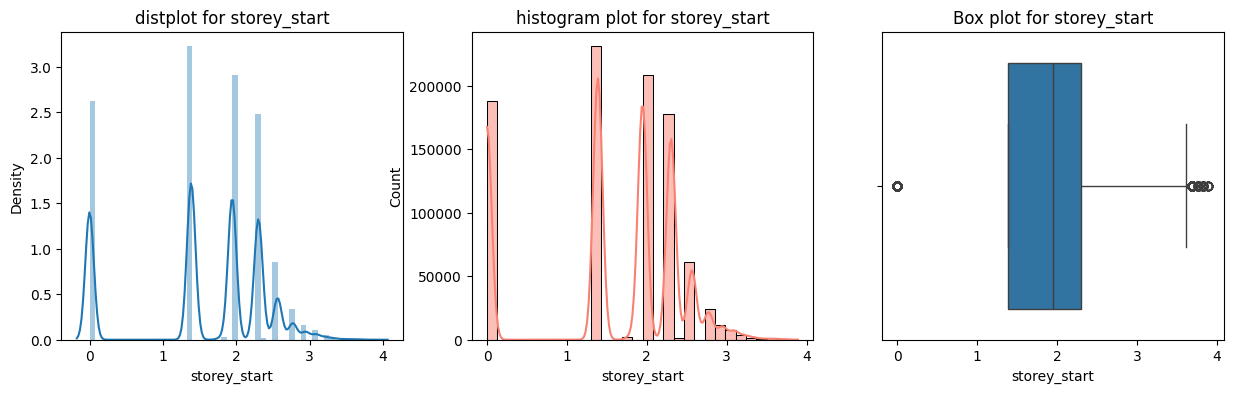

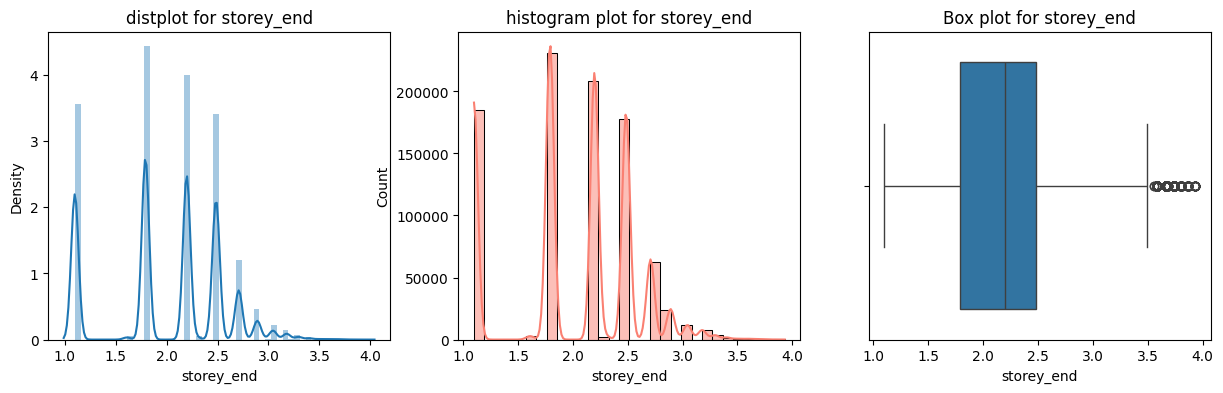

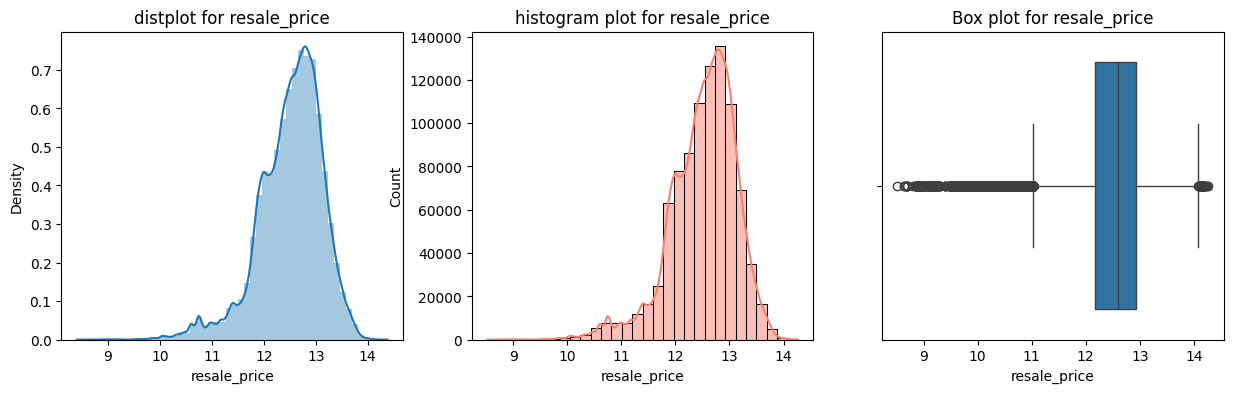

In [66]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df_final_3,i)

## Outliers Handling - Interquartile Range(IQR) Method

In [67]:
df_final_4= df_final_3.copy()

In [57]:
# The Outlier Columns are
# 1. floor_area_sqm
# 2. storey_start
# 3. sortey_end
# 4. resale_price
# Recorrect the Outliers

In [58]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [68]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [69]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_final_4,j)

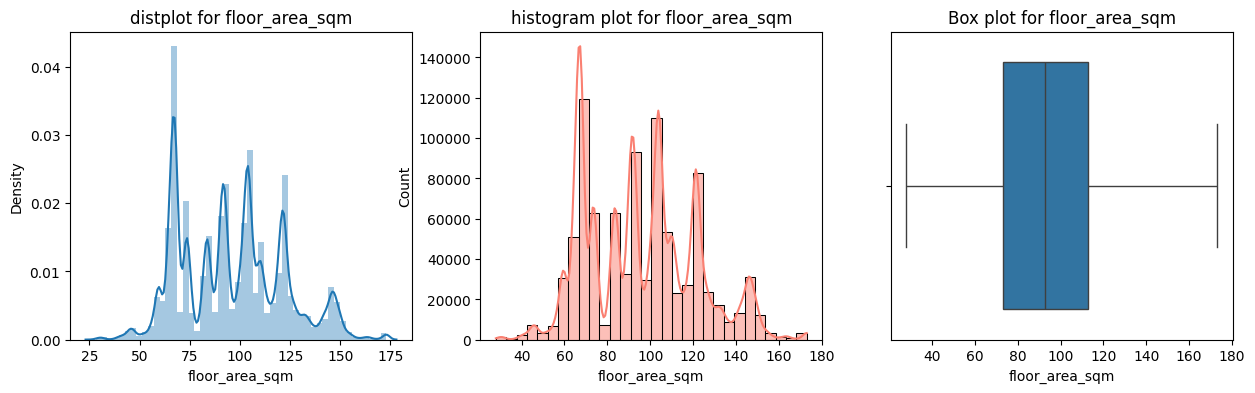

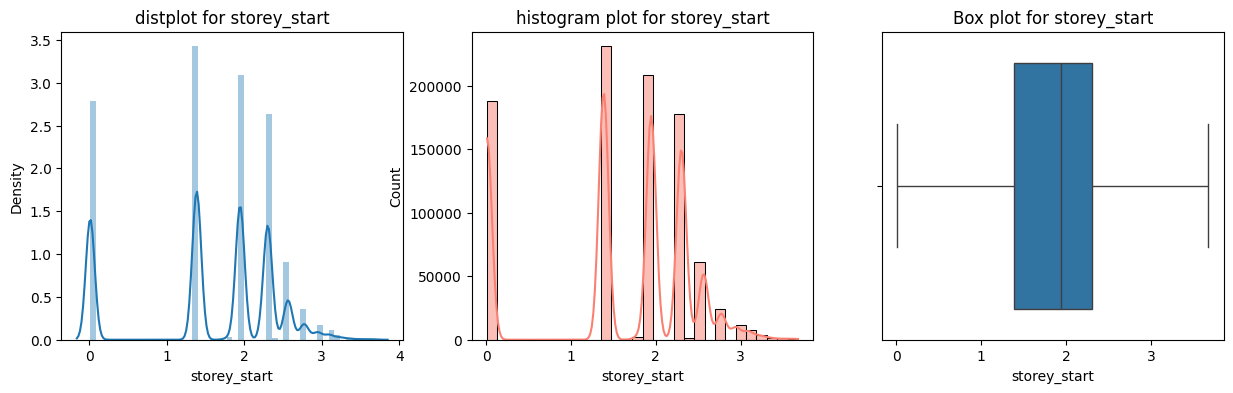

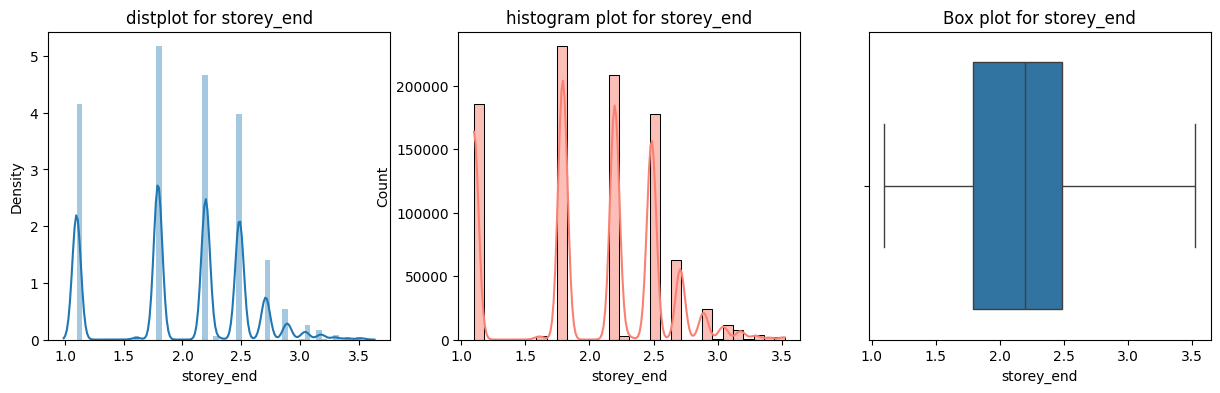

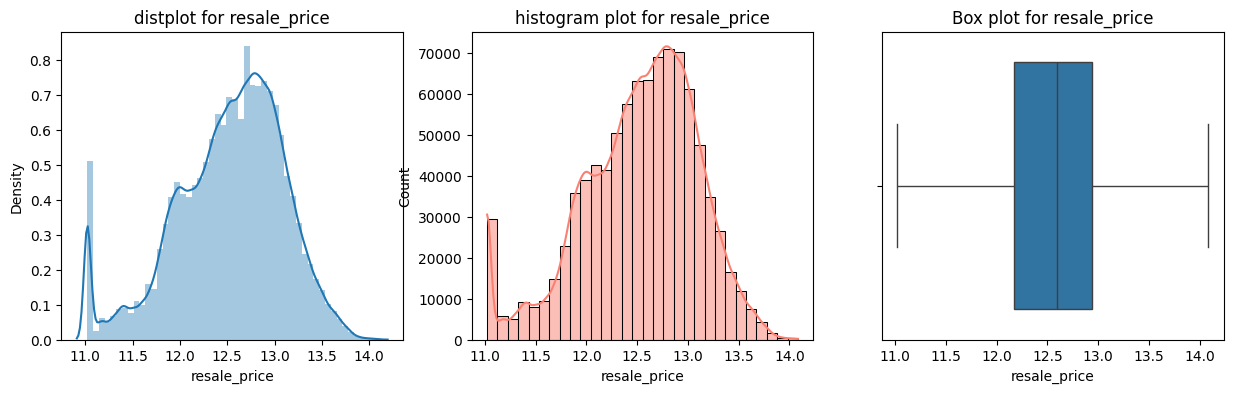

In [70]:
for k in outlier_columns:
    plot(df_final_4,k)

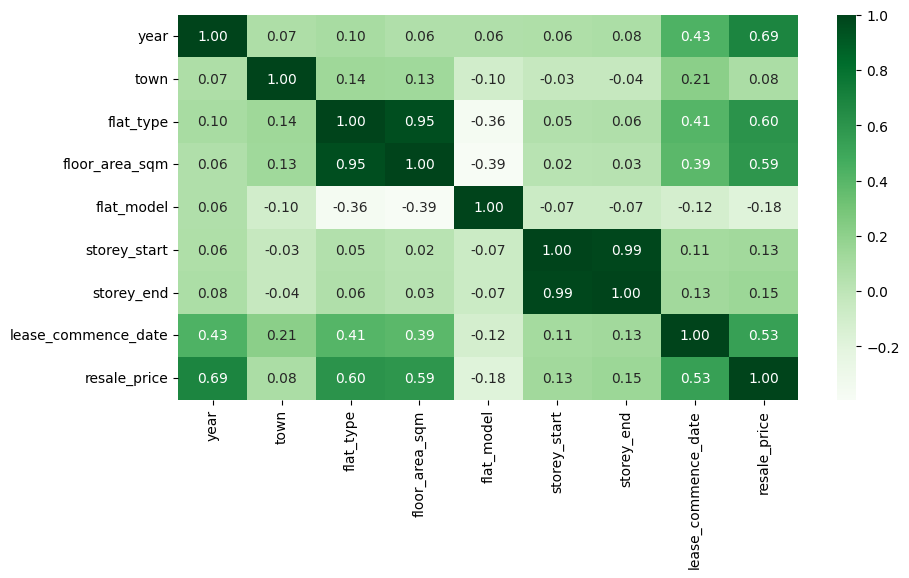

In [71]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(df_final_4.corr(), annot= True, cmap="Greens", fmt="0.2f")
plt.show()

## Model Selection (Regression)

In [72]:
df_final_5= df_final_4.copy()

In [73]:
df_final_5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,920080.0,2006.072916,9.250057,1990.000000,1999.000000,2005.000000,2013.000000,2024.000000
town,920080.0,13.650055,8.797353,0.000000,5.000000,13.000000,23.000000,26.000000
flat_type,920080.0,3.014853,0.949479,0.000000,2.000000,3.000000,4.000000,7.000000
floor_area_sqm,920080.0,95.691186,25.734334,28.000000,73.000000,93.000000,113.000000,173.000000
flat_model,920080.0,15.713954,6.671384,0.000000,9.000000,16.000000,21.000000,33.000000
storey_start,920080.0,1.574996,0.900644,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,920080.0,2.009039,0.568997,1.098612,1.791759,2.197225,2.484907,3.524627
lease_commence_date,920080.0,1988.225263,10.603715,1966.000000,1981.000000,1986.000000,1996.000000,2022.000000
resale_price,920080.0,12.526659,0.575195,11.022063,12.170445,12.594731,12.936034,14.084416


In [74]:
np.exp(13.942690)

1135620.7776035476

In [75]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] >= 1135620]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,lease_commence_date,resale_price
743930,2016,12,14,2.0,259.0,31.0,6998,1,3,1972,1150000.0
745910,2017,2,2,4.0,120.0,6.0,3318,40,42,2011,1180000.0
755353,2017,7,19,5.0,156.0,5.0,1265,19,21,1995,1160000.0
761852,2017,11,7,4.0,107.0,33.0,2006,43,45,2011,1138000.0
767656,2018,3,7,4.0,107.0,33.0,2003,37,39,2011,1145000.0
...,...,...,...,...,...,...,...,...,...,...,...
919398,2024,3,19,4.0,117.0,9.0,7518,7,9,2011,1280000.0
919399,2024,3,19,5.0,154.0,15.0,1253,4,6,1995,1200000.0
919623,2024,3,22,5.0,150.0,5.0,4075,7,9,1986,1208000.0
919624,2024,3,22,5.0,146.0,15.0,4075,10,12,1986,1150000.0


In [76]:
np.exp(12.104561)

180694.13157722994

In [77]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] <= 180694]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,lease_commence_date,resale_price
0,1990,1,0,0.0,31.0,7.0,3832,10,12,1977,9000.0
1,1990,1,0,0.0,31.0,7.0,3832,4,6,1977,6000.0
2,1990,1,0,0.0,31.0,7.0,3832,10,12,1977,8000.0
3,1990,1,0,0.0,31.0,7.0,3832,7,9,1977,6000.0
4,1990,1,0,2.0,73.0,20.0,2371,4,6,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...,...
834170,2021,1,25,1.0,45.0,9.0,2420,7,9,1986,180000.0
834720,2021,2,4,0.0,31.0,9.0,8288,4,6,1975,180000.0
904549,2023,8,23,2.0,67.0,16.0,6544,7,9,2015,150000.0
913117,2023,12,25,1.0,47.0,16.0,1815,28,30,2019,150000.0


In [78]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [79]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [80]:
select_model(df_final_5, LinearRegression)
select_model(df_final_5, DecisionTreeRegressor)
select_model(df_final_5, RandomForestRegressor)
select_model(df_final_5, AdaBoostRegressor)
select_model(df_final_5, ExtraTreesRegressor)
select_model(df_final_5, GradientBoostingRegressor)
select_model(df_final_5, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.7840136370881166, 'Mean_squared_error': 0.07146564377257814, 'Root_mean_squared_error': 0.267330588920494, 'Mean_absolute_error': 0.21015365681939918}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.7840822511092632, 'Mean_squared_error': 0.07140849554801373, 'Root_mean_squared_error': 0.2672236807395889, 'Mean_absolute_error': 0.2102168597181287}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9887155981311646, 'Mean_squared_error': 0.0037337868616909454, 'Root_mean_squared_error': 0.06110472045342279, 'Mean_absolute_error': 0.03713440721856178}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9703816409644438, 'Mean_squared_error': 0.009795408067172214, 'Root_mean_squared_error': 0.09897175388550117, 'Mean_absolute_error': 0.0679996136962472}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9877555691839498, 'Mean_squared_error': 0.00405144

In [81]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= df_final_5.drop(columns=["resale_price"])
y= df_final_5["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9754126186439345, 'Mean_squared_error': 0.008112232275826562, 'Root_mean_squared_error': 0.09006793145080308, 'Mean_absolute_error': 0.06303437642740613}


In [82]:
df_final_5.iloc[10456]

year                   1990.000000
town                      0.000000
flat_type                 3.000000
floor_area_sqm           92.000000
flat_model               20.000000
storey_start              1.945910
storey_end                2.197225
lease_commence_date    1980.000000
resale_price             11.512925
Name: 10456, dtype: float64

In [83]:
np.exp(12.815838)

367999.92008841544

In [86]:
user_data = np.array([[2015,4,2,74,8,0.011858,1.098612,1985]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

12.7957466083068

In [87]:
np.exp(12.792003979535888)

359332.7000997733

In [88]:
# Saving the Model unsing pickle
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)

In [1]:
import pickle
import numpy as np

In [2]:
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [5]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

12.281582166172816

In [6]:
np.exp(12.313923357750493)

222776.28881715712